In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\LENOVO\Documents\Naresh IT\ML\winequality_red.csv"

In [3]:
wine_df=pd.read_csv(path)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
# scale and vif

In [9]:
# input_df=wine_df.drop('quality',axis=1)
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# scaled_feature=ss.fit_transform(input_df)
# data_scaled=pd.DataFrame(scaled_feature,columns=input_df.columns)
# data_scaled

In [10]:
# corr_matrix=data_scaled.corr()
# print(corr_matrix)

In [11]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
# plt.show()

In [12]:
# plt.subplot(1,4,1).scatter(data_scaled['fixed acidity'],data_scaled['citric acid'])
# plt.subplot(1,4,2).scatter(data_scaled['fixed acidity'],data_scaled['pH'])
# plt.subplot(1,4,3).scatter(data_scaled['density'],data_scaled['alcohol'])
# plt.subplot(1,4,4).scatter(data_scaled['fixed acidity'],data_scaled['density'])
# plt.show()

In [13]:
#vif

In [14]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# num_feature=data_scaled.shape[1]
# vif_data=pd.DataFrame()
# vif_data['feature']=data_scaled.columns
# vif_data['VIF']=[variance_inflation_factor(data_scaled.values,i)for i in range(num_feature)]
# vif_data

In [15]:
# first VIF the Scale the data

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=wine_df.drop('quality',axis=1)
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif_data
                 

,feature,VIF
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


In [17]:
# features_to_keep = vif_data[vif_data['VIF'] < 15]['feature'].tolist()

# # Print the features to keep
# print(features_to_keep)

In [18]:
con = vif_data['VIF'] < 15
filtered_vif_data = vif_data[con]
feature_to_keep = filtered_vif_data['feature'].to_list()
print(feature_to_keep)

['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']


In [19]:
wine_df_new=wine_df[feature_to_keep+['quality']]
wine_df_new

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,quality
0,0.00,1.9,0.076,11.0,34.0,5
1,0.00,2.6,0.098,25.0,67.0,5
2,0.04,2.3,0.092,15.0,54.0,5
3,0.56,1.9,0.075,17.0,60.0,6
4,0.00,1.9,0.076,11.0,34.0,5
...,...,...,...,...,...,...
1594,0.08,2.0,0.090,32.0,44.0,5
1595,0.10,2.2,0.062,39.0,51.0,6
1596,0.13,2.3,0.076,29.0,40.0,6
1597,0.12,2.0,0.075,32.0,44.0,5


In [20]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
data_scaled = pd.DataFrame(sc.fit_transform(wine_df[feature_to_keep]), columns=feature_to_keep)
data_scaled['quality']=wine_df['quality']
data_scaled

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,quality
0,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,5
1,-1.391472,0.043416,0.223875,0.872638,0.624363,5
2,-1.186070,-0.169427,0.096353,-0.083669,0.229047,5
3,1.484154,-0.453218,-0.264960,0.107592,0.411500,6
4,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,5
...,...,...,...,...,...,...
1594,-0.980669,-0.382271,0.053845,1.542054,-0.075043,5
1595,-0.877968,-0.240375,-0.541259,2.211469,0.137820,6
1596,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,6
1597,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,5


In [21]:
x=data_scaled.drop('quality',axis=1)
y=data_scaled['quality']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
data_scaled.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1599, 6), (1279, 5), (320, 5), (1279,), (320,))

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
prediction=model.predict(x_test)
prediction

array([5.30761724, 5.16313093, 5.62553337, 5.83680193, 5.75124157,
       5.74344307, 4.91969944, 5.52522329, 5.89364653, 5.6801294 ,
       6.10397734, 5.4981784 , 5.60332271, 5.66085597, 5.78174487,
       6.03944057, 5.12691062, 5.67768568, 6.0726392 , 5.30686376,
       5.48254351, 5.59436514, 5.65156925, 5.65201142, 5.45998067,
       5.66360099, 5.86906768, 5.34210942, 5.29257129, 5.86768703,
       5.43023508, 5.56836737, 5.84964788, 5.95361969, 5.45486087,
       5.27710211, 6.00876234, 5.57002659, 5.96178054, 6.00236991,
       6.16326076, 5.19250103, 6.07014125, 4.92936484, 5.91970081,
       5.51713814, 5.9426719 , 6.02208423, 5.54322706, 5.50214354,
       5.02080643, 4.82203222, 5.41174008, 5.10314884, 5.34823103,
       5.21048505, 5.77290236, 5.53021595, 5.69368926, 5.67196647,
       5.39167348, 5.79167555, 5.77887822, 5.61681939, 6.00802958,
       5.99553309, 6.19161026, 5.28717034, 5.93851805, 5.5917379 ,
       5.80209473, 5.14645301, 5.90528534, 5.60711774, 5.81635

In [26]:
################################## Assumptions   ###########################

In [27]:
#Linearity

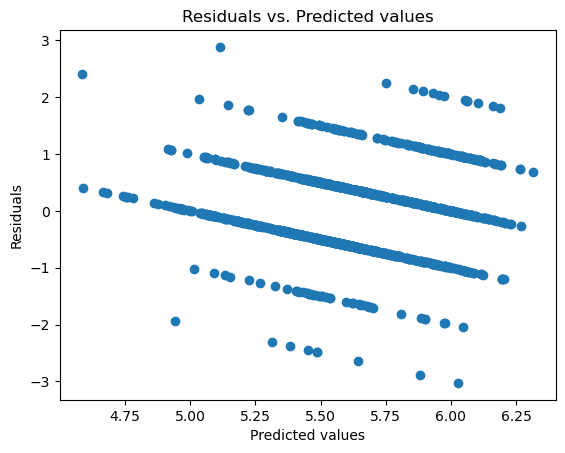

In [28]:
import matplotlib.pyplot as plt

preds = model.predict(x_train)
residuals = y_train - preds  # (actual - prediction)

plt.scatter(preds, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted values")
plt.show()


In [29]:
# Independence of errors

In [30]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 2.0885213861604313


In [31]:
# Homoscedasticity

In [32]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
x_train_with_const = sm.add_constant(x_train)

# Breusch-Pagan test using the correct independent variable matrix
_, pval, _, _ = sms.diagnostic.het_breuschpagan(residuals, x_train_with_const)
print(f'Breusch-Pagan p-value: {pval}')

# Interpret the p-value for homoscedasticity
if pval < 0.05:
    print("There is evidence of heteroscedasticity.")
else:
    print("No evidence of heteroscedasticity.")

Breusch-Pagan p-value: 0.00018273271527801196
There is evidence of heteroscedasticity.


In [33]:
# Normality of Residuals

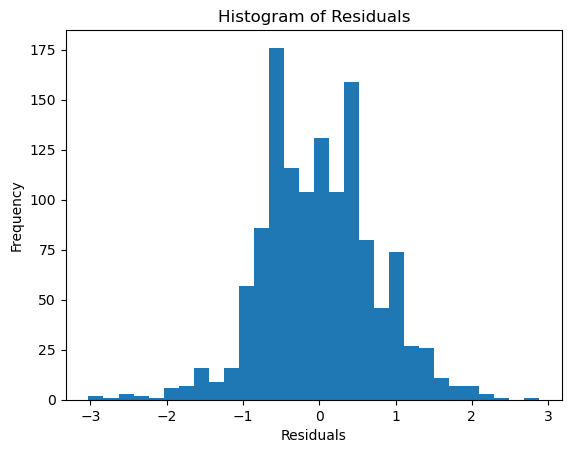

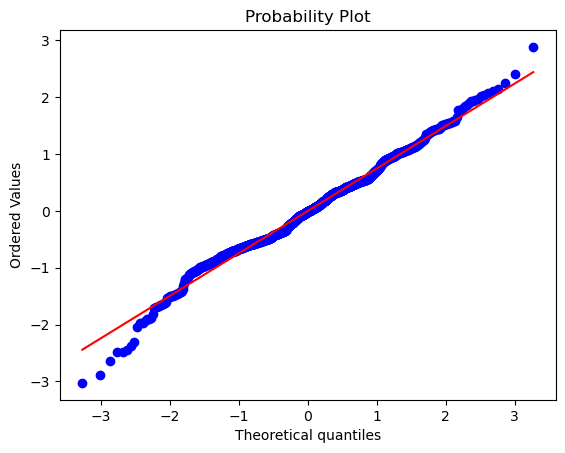

In [34]:
import scipy.stats as stats

# Plot histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [35]:
# Multicollinearity

In [36]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vif_data)

high_vif = vif_data[vif_data["VIF"] > 5]  
if not high_vif.empty:
    print("Variables with high multicollinearity:")
    print(high_vif)
else:
    print("No variables with high multicollinearity detected.")


               Variable       VIF
0           citric acid  1.092882
1        residual sugar  1.061876
2             chlorides  1.054137
3   free sulfur dioxide  1.852727
4  total sulfur dioxide  1.833610
No variables with high multicollinearity detected.


In [37]:
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)
r_sq=r2_score(y_test,prediction)

print("MSE:",mse)
print("RMSE:",rmse)
print("R-sqaure:",r_sq)

MSE: 0.5807637759107404
RMSE: 0.7620785890646321
R-sqaure: 0.11131052984563716


In [38]:
import pickle
pickle.dump(model,open('wine_model_new.pkl','wb'))

In [39]:
model = pickle.load(open('wine_model_new.pkl','rb'))
model

LinearRegression()